In [1]:
# fbref have a shot chart of every shot taken in a match assigned with a minute value
# we'll scrape this data and plot using matplotlib

In [2]:
# Import the relevant packages

import pandas as pd

In [3]:
url = 'https://fbref.com/en/matches/1714cebe/Chelsea-Brighton-and-Hove-Albion-September-28-2024-Premier-League'

df = pd.read_html(url, attrs={"id":"shots_all"})[0]

df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Minute             Player              Squad                 xG   
0                  4       Jadon Sancho            Chelsea               0.08   
1                  7   Georginio Rutter           Brighton               0.09   
2                 19        Cole Palmer            Chelsea               0.61   
3                 21       Kaoru Mitoma           Brighton               0.01   
4                 21        Cole Palmer            Chelsea               0.22   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
                PSxG            Outcome           Distance          Body Part   
0               0.00            Blocked               15.0         Right Foot   
1               0.23               Goal               15.0               Head   
2               0.39              Saved               15.0          Left Foot   
3               0.00            Blocked               25.0         Right Foot   
4               0.95               Goal               17.0          Left Foot   

  Unnamed: 8_level_0            SCA 1                      SCA 2               
               Notes           Player        Event        Player        Event  
0                NaN   Moisés Caicedo  Pass (Live)           NaN          NaN  
1                NaN              NaN          NaN           NaN          NaN  
2                NaN   Enzo Fernández  Pass (Live)  Levi Colwill  Pass (Live)  
3                NaN     Mats Wieffer  Pass (Live)           NaN          NaN  
4                NaN  Nicolas Jackson  Pass (Live)           NaN          NaN

In [4]:
# We'll remove/drop 'SCA' columns

df = df.drop(columns=[x for x in df.columns if 'SCA' in x[0]])

df.head()

,Unnamed: 0_level_0,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0
,Minute,Player,Squad,xG,PSxG,Outcome,Distance,Body Part,Notes
0,4,Jadon Sancho,Chelsea,0.08,0.00,Blocked,15.0,Right Foot,NaN
1,7,Georginio Rutter,Brighton,0.09,0.23,Goal,15.0,Head,NaN
2,19,Cole Palmer,Chelsea,0.61,0.39,Saved,15.0,Left Foot,NaN
3,21,Kaoru Mitoma,Brighton,0.01,0.00,Blocked,25.0,Right Foot,NaN
4,21,Cole Palmer,Chelsea,0.22,0.95,Goal,17.0,Left Foot,NaN


In [5]:
# We can also get rid of multi level index (extra headers) also

df.columns = df.columns.droplevel(0)

df.head()

,Minute,Player,Squad,xG,PSxG,Outcome,Distance,Body Part,Notes
0,4,Jadon Sancho,Chelsea,0.08,0.00,Blocked,15.0,Right Foot,NaN
1,7,Georginio Rutter,Brighton,0.09,0.23,Goal,15.0,Head,NaN
2,19,Cole Palmer,Chelsea,0.61,0.39,Saved,15.0,Left Foot,NaN
3,21,Kaoru Mitoma,Brighton,0.01,0.00,Blocked,25.0,Right Foot,NaN
4,21,Cole Palmer,Chelsea,0.22,0.95,Goal,17.0,Left Foot,NaN


In [6]:
# Now we filter for the data we want/need

df = df[['Minute', 'Player', 'Squad', 'xG', 'Outcome']]

df

,Minute,Player,Squad,xG,Outcome
0,4,Jadon Sancho,Chelsea,0.08,Blocked
1,7,Georginio Rutter,Brighton,0.09,Goal
2,19,Cole Palmer,Chelsea,0.61,Saved
3,21,Kaoru Mitoma,Brighton,0.01,Blocked
4,21,Cole Palmer,Chelsea,0.22,Goal
5,28,Cole Palmer (pen),Chelsea,0.79,Goal
6,31,Cole Palmer,Chelsea,0.05,Goal
7,34,Carlos Baleba,Brighton,0.27,Goal
8,34,Carlos Baleba,Brighton,0.05,Saved
9,36,Danny Welbeck,Brighton,0.11,Off Target


In [7]:
# Add a column called 'cumulative_xg' to add up the rolling sum of team xg

df['cumulative_xG'] = df.groupby('Squad')['xG'].cumsum()

df

,Minute,Player,Squad,xG,Outcome,cumulative_xG
0,4,Jadon Sancho,Chelsea,0.08,Blocked,0.08
1,7,Georginio Rutter,Brighton,0.09,Goal,0.09
2,19,Cole Palmer,Chelsea,0.61,Saved,0.69
3,21,Kaoru Mitoma,Brighton,0.01,Blocked,0.10
4,21,Cole Palmer,Chelsea,0.22,Goal,0.91
5,28,Cole Palmer (pen),Chelsea,0.79,Goal,1.70
6,31,Cole Palmer,Chelsea,0.05,Goal,1.75
7,34,Carlos Baleba,Brighton,0.27,Goal,0.37
8,34,Carlos Baleba,Brighton,0.05,Saved,0.42
9,36,Danny Welbeck,Brighton,0.11,Off Target,0.53


In [8]:
# We can drop the NaN rows

df = df.dropna(subset=["Minute"])

In [9]:
# Now split the data into halfs - create 1st & 2nd half columns

df['Half'] = df['Minute'].apply(lambda x: 1 if int(x.split('+')[0]) <= 45 else 2)

C:\Users\jmaher\AppData\Local\Temp\ipykernel_21140\1448510758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Half'] = df['Minute'].apply(lambda x: 1 if int(x.split('+')[0]) <= 45 else 2)


In [10]:
# Create 'new minute' to plot on the graph for '90+2' for example to become 92

df["Minute"] = df['Minute'].apply(lambda x: sum([int(y) for y in x.split('+')]))

C:\Users\jmaher\AppData\Local\Temp\ipykernel_21140\1864624452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Minute"] = df['Minute'].apply(lambda x: sum([int(y) for y in x.split('+')]))


In [11]:
# We can see all these changes in the df

df

,Minute,Player,Squad,xG,Outcome,cumulative_xG,Half
0,4,Jadon Sancho,Chelsea,0.08,Blocked,0.08,1
1,7,Georginio Rutter,Brighton,0.09,Goal,0.09,1
2,19,Cole Palmer,Chelsea,0.61,Saved,0.69,1
3,21,Kaoru Mitoma,Brighton,0.01,Blocked,0.10,1
4,21,Cole Palmer,Chelsea,0.22,Goal,0.91,1
5,28,Cole Palmer (pen),Chelsea,0.79,Goal,1.70,1
6,31,Cole Palmer,Chelsea,0.05,Goal,1.75,1
7,34,Carlos Baleba,Brighton,0.27,Goal,0.37,1
8,34,Carlos Baleba,Brighton,0.05,Saved,0.42,1
9,36,Danny Welbeck,Brighton,0.11,Off Target,0.53,1


Text(0.1, 0.0, '@fivefivestat/twitter')

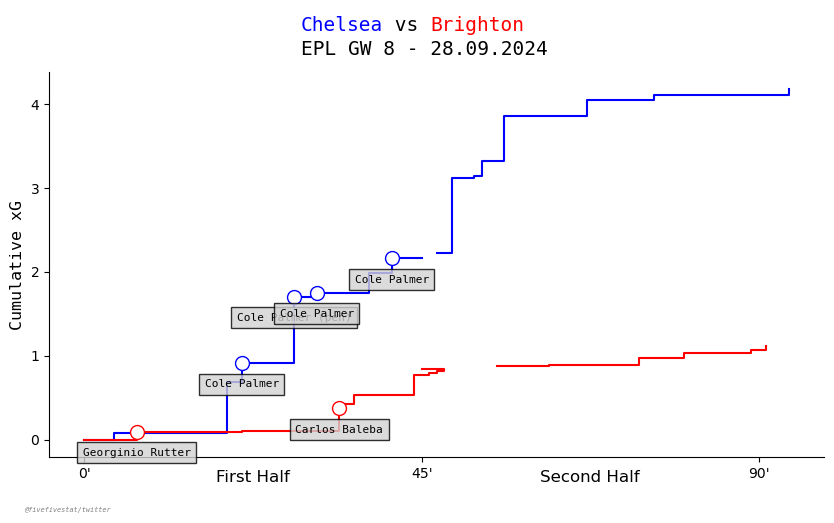

In [14]:
# data prep done - now to plot data

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5)) # create the canvas

# We'll assign home & away team names

home_team_in_url = url.split('/')[-1].split('-')[0]

unique_names_in_df = df['Squad'].unique()

if  home_team_in_url == unique_names_in_df[0]:
    home_team = unique_names_in_df[0]
    away_team = unique_names_in_df[-1]
else:
    home_team = unique_names_in_df[-1]
    away_team = unique_names_in_df[0]

# assign colors to each team

home_color = 'blue'
away_color = 'red'

# now plot the xg for each team per half

for team in df['Squad'].unique():
    team_df = df[df['Squad'] == team]
               
# add xg goals row to start at 0
    team_df = pd.concat([pd.DataFrame({'Squad': team, 'Minute': 0, 'XG': 0, 'Outcome': '', 'cumulative_xG': 0, 'Half': 1}, index=[0]), team_df])
               
# now do the same to start at 45
    team_df = pd.concat([team_df[team_df['Half'] == 1],
         pd.DataFrame({'Squad': team, 'Minute': 45, 'XG': 0, 'Outcome': '', 'cumulative_xG': team_df[team_df['Half'] == 1]['cumulative_xG'].iloc[-1], 'Half': 1}, index=[0]),
         team_df[team_df['Half'] == 2]          
                ])
                    
                    
                    
    # now write code to plot this - using for loop to loop over each half to plot each half correctly                
    for half in team_df['Half'].unique():
        half_df = team_df[team_df['Half'] == half]
        ax.plot(
            half_df['Minute'],
            half_df['cumulative_xG'],
            drawstyle='steps-post',
            c = home_color if team=='Chelsea'else away_color
        )
        

# We can add a scatter plot to show the goals
for team in df['Squad'].unique():
    team_df = df[(df['Squad'] == team) & (df['Outcome'] == 'Goal')].to_dict(orient='records')
    for x in team_df:
        ax.scatter(
            x['Minute'], 
            x['cumulative_xG'], 
            c='white',
            edgecolor= home_color if team == 'Chelsea' else away_color,
            s=100,
            zorder=5 # We want the goals to be on top of the lines
        )
        
        # add a label to the goals for the player who scored
        ax.text(
            x['Minute'], 
            x['cumulative_xG'] - .25, 
            x['Player'], 
            ha='center', 
            va='center', 
            #c = 'white',
            fontfamily='monospace', 
            fontsize=8,
            zorder=10,
            bbox=dict(facecolor='lightgray', edgecolor='black', alpha=0.8)  # Add background to names with opacity
        )
        

#clean up the display data

ax.set_xticks([0, 45, 90])
ax.set_xticklabels(['0\'', '45\'', '90\''])

ax.text(22.5, -.5, 'First Half', ha='center', fontsize=12)
ax.text(67.5, -.5, 'Second Half', ha='center', fontsize=12)

# Let's label the y axis with the cumulative xG
ax.set_ylabel('Cumulative xG', fontfamily='monospace', fontsize=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Let's change the color of the title to show which team is which using the highlight-text package
from highlight_text import fig_text

fig_text(
    0.5,
    0.95,
    f'<{home_team}> vs <{away_team}>\nEPL GW 8 - 28.09.2024', 
    fontsize=14, 
    ha='center', 
    va='center', 
    ax=ax, 
    fontfamily='monospace', 
    highlight_textprops=[{'color': home_color}, {'color': away_color}]  # Provide the corresponding colors
)


# Now let's add a twitter @ to the bottom left of the plot
fig.text(
    0.1, 
    0.00, 
    '@fivefivestat/twitter', 
    fontsize=5, 
    fontstyle='oblique', 
    fontfamily='monospace', 
    color='gray'
)